<a href="https://colab.research.google.com/github/SATWIKHALLAD/TASK4/blob/main/TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0, Cost: 454240.60829412536
Iteration 1000, Cost: 233616.4196017942
Iteration 2000, Cost: 133451.59888810714
Iteration 3000, Cost: 83691.76725600423
Iteration 4000, Cost: 56525.081331388916
Iteration 5000, Cost: 40387.73883985207
Iteration 6000, Cost: 30144.657798077136
Iteration 7000, Cost: 23319.583619138397
Iteration 8000, Cost: 18608.042401640832
Iteration 9000, Cost: 15265.224842505279
Final parameters: a=190.0982, b=358.6593, c=285.6060


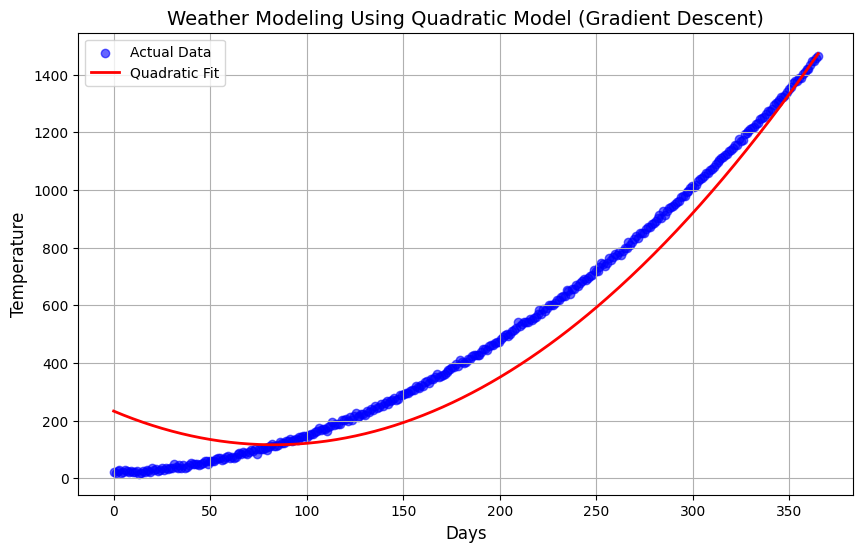

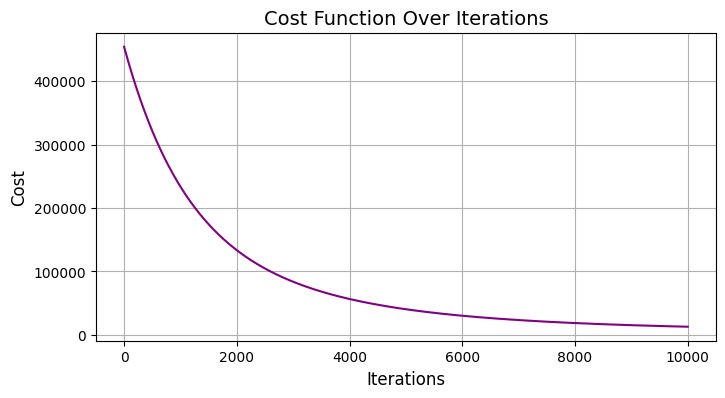

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.linspace(0, 365, 365)
y = 0.01 * x**2 + 0.3 * x + 20 + np.random.normal(0, 5, 365)
x_normalized = (x - np.mean(x)) / np.std(x)

a, b, c = 0.0, 0.0, 0.0
learning_rate = 1e-4
iterations = 10000
lambda_reg = 0.01

n = len(y)
cost_history = []
for i in range(iterations):
    y_pred = a * x_normalized**2 + b * x_normalized + c
    error = y - y_pred
    a_gradient = (-2 / n) * np.sum(x_normalized**2 * error) + 2 * lambda_reg * a
    b_gradient = (-2 / n) * np.sum(x_normalized * error) + 2 * lambda_reg * b
    c_gradient = (-2 / n) * np.sum(error) + 2 * lambda_reg * c
    a = a - learning_rate * a_gradient
    b = b - learning_rate * b_gradient
    c = c - learning_rate * c_gradient


    cost = np.mean(error**2) + lambda_reg * (a**2 + b**2 + c**2)
    cost_history.append(cost)

    if i % 1000 == 0:
        print(f"Iteration {i}, Cost: {cost}")

print(f"Final parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}")
y_final_pred = a * x_normalized**2 + b * x_normalized + c

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Actual Data', alpha=0.6, color='blue')
plt.plot(x, y_final_pred, label='Quadratic Fit', color='red', linewidth=2)
plt.title("Weather Modeling Using Quadratic Model (Gradient Descent)", fontsize=14)
plt.xlabel("Days", fontsize=12)
plt.ylabel("Temperature", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(range(iterations), cost_history, label="Cost", color="purple")
plt.title("Cost Function Over Iterations", fontsize=14)
plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.grid(True)
plt.show()